### Some calculations to reproduce those in Mancinelli and Shearer, 2016, JGR

In [101]:
#This cell calculates the correlation length

from numpy import pi, sin, cos, sqrt, array, exp

alpha = 8.0 #Vp
freq  = 1.0 #Hz 
sigma = 15. #degrees

omega = 2.*pi*freq

corlen = alpha / (sqrt(2.)*omega*sin(sigma/2. * pi / 180.))

print('Correlation distance = %.2f km' % corlen)

Correlation distance = 6.90 km


In [98]:
#This part calculates the probability versus RMS topography


lambd = alpha/freq  #wavelength
k0 = 2.*pi/lambd  #wavenumber
a = corlen  #correlation length (from above)
omega = 1.3  #geometrical factor from Bataille

def calc_scattering_prob(zeta):
    #zeta is RMS height in meters

    def PHI(phi, theta):  #capital PHI from Mancinelli and Shearer (2016) paper
        #phi is the azimuthal angle
        #and theta is the polar angle
        factor = zeta**2 / (4*pi) * a**2
        r = array([1,0,0])
        s = array([sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta)])
        k = r - s
        kmag = sum(k**2)**0.5

        return omega * factor * exp(- kmag**2 * a**2 /4.)

    #integrate.dblquad(f, 0., 3.14, 0., 3.14)

    from numpy import linspace
    phis = linspace(0, 2.*pi, 100)
    thetas = linspace(0, pi, 100)

    dtheta = thetas[1] - thetas[0]
    dphi   = phis[1] - phis[0]

    intsum = 0.0

    for phi in phis:
        for theta in thetas:
            tmp = PHI(phi,theta)
            intsum += tmp * abs(sin(theta))*dphi*dtheta  #integration in spherical coords on unit sphere
            
    return k0**2 * intsum
        

In [99]:
zetas = linspace(0.,1.0,21)
Ps = []
for zeta in zetas:
    Ps.append(calc_scattering_prob(zeta))


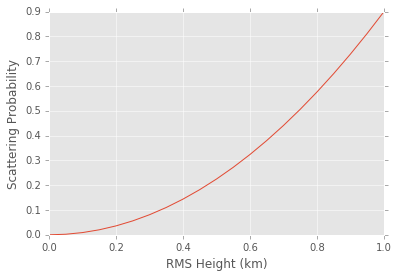

In [100]:
from matplotlib import pylab as plt
%matplotlib inline
plt.style.use('ggplot')
plt.plot(zetas, Ps)
plt.ylabel('Scattering Probability')
plt.xlabel('RMS Height (km)')
